<a href="https://colab.research.google.com/github/aronsalinas96/tensorflow_basics/blob/main/03_CNN_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

We will use the dataset from https://www.kaggle.com/dansbecker/food-101 , but instead of use the 101 classes, we will only use two classes (pizza & steak).

## Get the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-02-12 15:55:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 108.177.15.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   113MB/s    in 0.9s    

2022-02-12 15:55:37 (113 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

A very crucial step at the beginning of any machine learning project is becoming ONE with the data.

And for a cumputer vision project... this usually means visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)

['pizza' 'steak']


## Plotting random images

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


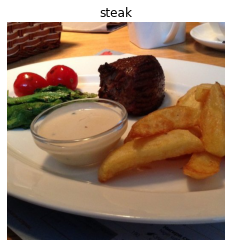

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

## An end-to-end example

Let's build a convolutional n eural network to find patterns in our images, we need a way to:

* Load our images
* Prepocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to the training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

model_1 = tf.keras.models.Sequential([
                                 tf.keras.layers.Conv2D(filters=10,
                                                        kernel_size=3,
                                                        activation="relu",
                                                        input_shape=(224, 224, 3)),
                                      tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size=2,
                                                                 padding="valid"),
                                      tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                      tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation="sigmoid")
                                      
                                    
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 296ms/step - loss: 0.5354 - accuracy: 0.7187 - val_loss: 0.3596 - val_accuracy: 0.8480
Epoch 2/5
47/47 [==============================] - 11s 229ms/step - loss: 0.4245 - accuracy: 0.8087 - val_loss: 0.3359 - val_accuracy: 0.8740
Epoch 3/5
47/47 [==============================] - 11s 231ms/step - loss: 0.4028 - accuracy: 0.8200 - val_loss: 0.3212 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 11s 228ms/step - loss: 0.3625 - accuracy: 0.8433 - val_loss: 0.3120 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 12s 254ms/step - loss: 0.3327 - accuracy: 0.8600 - val_loss: 0.3220 - val_accuracy: 0.8700


**Note:** Change execution enviroment and set GPU for faster execution!

## Binary Classification: Let's break it down

1. Become one with the data --> Visualize
2. Preprocess the data (scaling/normalizing)
3. Create a baseline model
4. Fit the model
5. Evaluate the model
6. Try to beat baseline model modifying parameters
7. Experiment until satisfied

### 1. Visualize the data

Image shape: (288, 512, 3)
Image shape: (384, 512, 3)


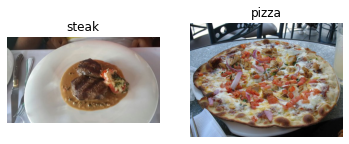

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data

In [ ]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all images at one time, a model might only look at 32 at a time (batch).

It does this for a couple of reasons:

1. 10,000 images (or more) might not fit into the memory of the processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
len(images), len(labels) # get the next batch of images/labels of training data

(32, 32)

### 3. Create a CNN model (start with a baseline)

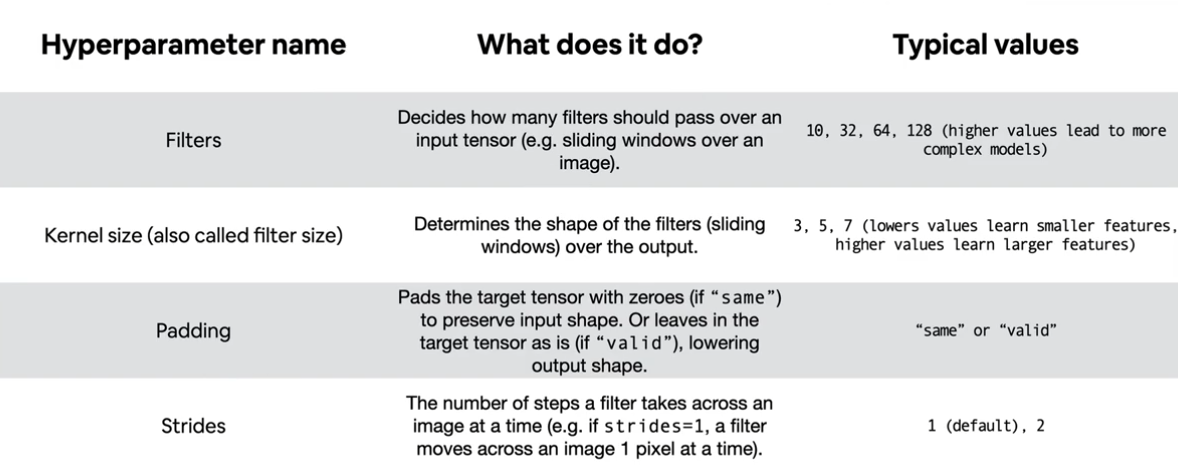

**Resource:** https://poloclub.github.io/cnn-explainer/

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

model_baseline = Sequential([
                             Conv2D(filters=10, # filter is the number of sliding windwos going across a input (higher = more complex model)
                                    kernel_size=3, # the size of the sliding window going across an input
                                    strides=(1, 1), # the size of the step the sliding window take across an input
                                    padding="same", #if "same", output shape is same as input shape, if "valid" output shape gets compressed
                                    activation="relu",
                                    input_shape=(224, 224, 3)),
                             Conv2D(10, 3, activation="relu"),
                             Conv2D(10, 3, activation="relu"),
                             Flatten(),
                             Dense(1, activation="sigmoid")
])

In [ ]:
model_baseline.compile(loss="binary_crossentropy",
                       optimizer=Adam(),
                       metrics=["accuracy"])

In [ ]:
model_baseline.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 484000)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 484001    
                                                                 
Total params: 486,101
Trainable params: 486,101
Non-trainable params: 0
_________________________________________________________________


## 4. Fit the model

In [ ]:
history_baseline = model_baseline.fit(train_data,
                                      epochs=5,
                                      steps_per_epoch=len(train_data),
                                      validation_data=test_data,
                                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 20s 415ms/step - loss: 1.0797 - accuracy: 0.6567 - val_loss: 0.4423 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 18s 373ms/step - loss: 0.4305 - accuracy: 0.8167 - val_loss: 0.3759 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 11s 240ms/step - loss: 0.3271 - accuracy: 0.8720 - val_loss: 0.3648 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 11s 245ms/step - loss: 0.2741 - accuracy: 0.8980 - val_loss: 0.3741 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 12s 247ms/step - loss: 0.1205 - accuracy: 0.9627 - val_loss: 0.3954 - val_accuracy: 0.8320


### 5. Evaluating our model

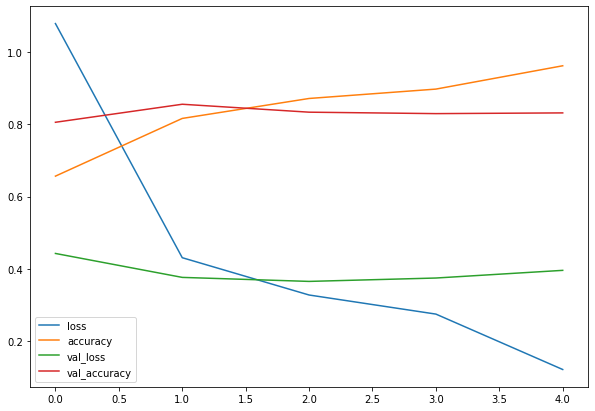

In [ ]:
import pandas as pd
pd.DataFrame(history_baseline.history).plot(figsize=(10,7))

In [14]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be dimished.

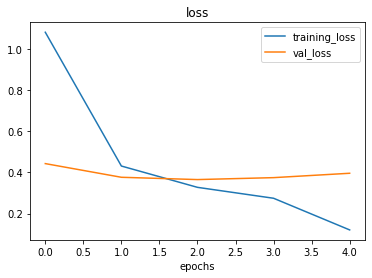

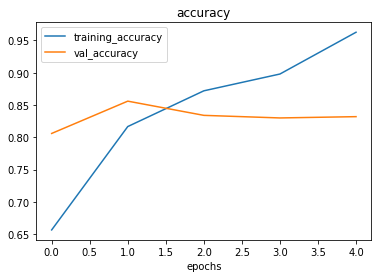

In [ ]:
plot_loss_curves(history_baseline)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline model.
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the ouput of flattened layer.

Reduce overfitting:

* Add data augmentation
* Add regularization layers (such as MaxPoold2D)
* Add more data...


In [ ]:
# Create a new baseline model

model_baseline_2 = Sequential([
                     Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
                     MaxPool2D(pool_size=2),
                     Conv2D(10, 3, activation="relu"),
                     MaxPool2D(),
                     Conv2D(10, 3, activation="relu"),
                     MaxPool2D(),
                     Flatten(),
                     Dense(1, activation="sigmoid")
])

In [ ]:
model_baseline_2.compile(loss="binary_crossentropy",
                         optimizer=Adam(),
                         metrics=["accuracy"])

In [ ]:
history_baseline_2 = model_baseline_2.fit(train_data,
                                          epochs=5,
                                          steps_per_epoch=len(train_data),
                                          validation_data=test_data,
                                          validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 18s 356ms/step - loss: 0.5863 - accuracy: 0.6860 - val_loss: 0.4482 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 16s 335ms/step - loss: 0.4571 - accuracy: 0.8000 - val_loss: 0.3661 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 16s 337ms/step - loss: 0.4125 - accuracy: 0.8060 - val_loss: 0.3428 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 16s 338ms/step - loss: 0.3899 - accuracy: 0.8273 - val_loss: 0.3272 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 16s 339ms/step - loss: 0.3653 - accuracy: 0.8413 - val_loss: 0.3129 - val_accuracy: 0.8640


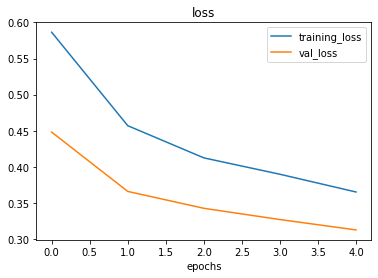

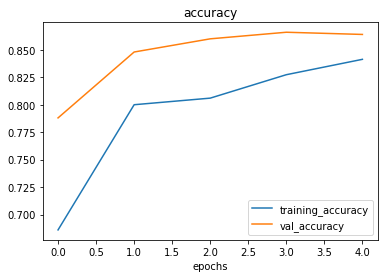

In [ ]:
plot_loss_curves(history_baseline_2)

### Data augmentation

Is the process of altering the training data, leading it to have more diversity and generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it or something similar.

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)

train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="binary"
                                              )

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
augmented_images, augmendet_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

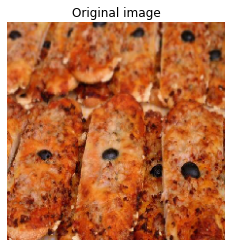

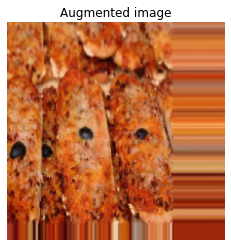

In [ ]:
import random 
random_number = random.randint(0, 31) #batch size
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False)

Model with augmented data

In [ ]:
model_baseline_3 = Sequential([
                     Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
                     MaxPool2D(pool_size=2),
                     Conv2D(10, 3, activation="relu"),
                     MaxPool2D(),
                     Conv2D(10, 3, activation="relu"),
                     MaxPool2D(),
                     Flatten(),
                     Dense(1, activation="sigmoid")
])

model_baseline_3.compile(loss="binary_crossentropy",
                         optimizer=Adam(),
                         metrics=["accuracy"])

history_baseline_3 = model_baseline_3.fit(train_data_augmented,
                                          epochs=5,
                                          steps_per_epoch=len(train_data_augmented),
                                          validation_data=test_data,
                                          validation_steps=len(test_data)
                                          )

Epoch 1/5
47/47 [==============================] - 46s 956ms/step - loss: 0.7413 - accuracy: 0.5040 - val_loss: 0.6806 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 45s 962ms/step - loss: 0.6961 - accuracy: 0.5120 - val_loss: 0.6785 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 26s 544ms/step - loss: 0.7003 - accuracy: 0.4933 - val_loss: 0.6755 - val_accuracy: 0.5280
Epoch 4/5
47/47 [==============================] - 26s 544ms/step - loss: 0.6835 - accuracy: 0.5020 - val_loss: 0.6559 - val_accuracy: 0.5480
Epoch 5/5
47/47 [==============================] - 27s 565ms/step - loss: 0.6848 - accuracy: 0.5293 - val_loss: 0.6440 - val_accuracy: 0.6580


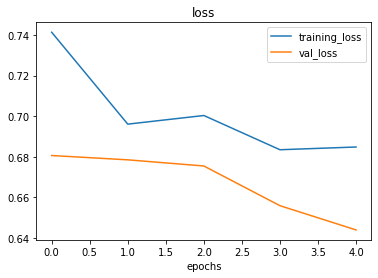

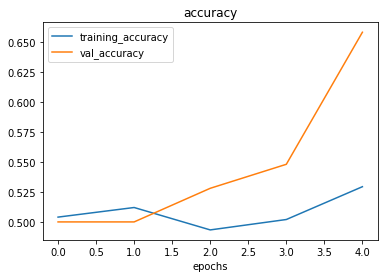

In [ ]:
plot_loss_curves(history_baseline_3)

Let's shuffle our augmented training data and train another model on it and see what happens.

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=True)

train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="binary"
                                              )

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model_baseline_4 = Sequential([
                     Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
                     MaxPool2D(pool_size=2),
                     Conv2D(10, 3, activation="relu"),
                     MaxPool2D(),
                     Conv2D(10, 3, activation="relu"),
                     MaxPool2D(),
                     Flatten(),
                     Dense(1, activation="sigmoid")
])

model_baseline_4.compile(loss="binary_crossentropy",
                         optimizer=Adam(),
                         metrics=["accuracy"])

history_baseline_4 = model_baseline_4.fit(train_data_augmented,
                                          epochs=5,
                                          steps_per_epoch=len(train_data_augmented),
                                          validation_data=test_data,
                                          validation_steps=len(test_data)
                                          )

Epoch 1/5
47/47 [==============================] - 27s 551ms/step - loss: 0.6625 - accuracy: 0.5627 - val_loss: 0.6555 - val_accuracy: 0.5920
Epoch 2/5
47/47 [==============================] - 26s 549ms/step - loss: 0.6083 - accuracy: 0.6600 - val_loss: 0.4721 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 26s 547ms/step - loss: 0.5532 - accuracy: 0.7167 - val_loss: 0.3911 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 26s 547ms/step - loss: 0.5156 - accuracy: 0.7547 - val_loss: 0.3711 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 25s 542ms/step - loss: 0.4996 - accuracy: 0.7620 - val_loss: 0.3892 - val_accuracy: 0.8260


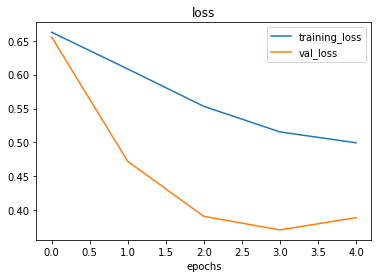

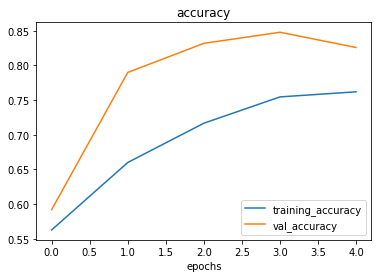

In [ ]:
plot_loss_curves(history_baseline_4)

Shuffle it's important because now it is learning both pizza and steak randomly instead of learning all pizza examples and then all steak examples.

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (Add more ``Conv2D/MaxPool2D`` layers).
* Increase the number of filters in each convolutional layer (e.g from 10 to 32 or even 64).
* Train for longer (more epochs).
* Find an ideal learning rate.
* Get more data.
* Use **transfer learning** to leverage what a another image model has learn and ajust it for our own use case.Ç

## Making a prediction with our trained model on our own custom data

In [ ]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")

--2022-02-12 17:48:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2022-02-12 17:48:29 (70.5 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

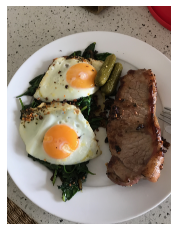

In [ ]:
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  #convert to tensor
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [ ]:
steak_processed = load_and_prep_image("03-steak.jpeg")

In [ ]:
pred = model_baseline_4.predict(tf.expand_dims(steak_processed, axis=0))
pred

array([[0.8644944]], dtype=float32)

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)
  
  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

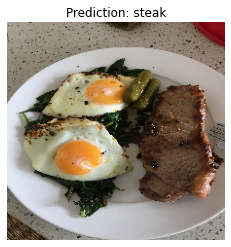

In [ ]:
pred_and_plot(model_baseline_4, "03-steak.jpeg")

# Multi-class Image Classification

1. Become one with the data
2. Preprocess the data
3. Create a baseline model
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model
7. Repeat until satisfied

In [6]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-02-13 18:02:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.12.128, 108.177.13.128, 74.125.26.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   235MB/s    in 2.1s    

2022-02-13 18:02:49 (235 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [7]:
import os 

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 

In [5]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

## 1. Become one with the data

In [8]:
import pathlib 
import numpy as np 
data_dir = pathlib.Path(train_dir) 
class_names = np.array(sorted( [item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


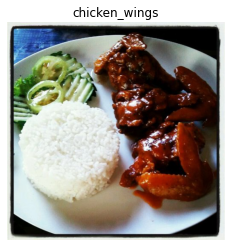

In [14]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2. Preprocess the data

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a baseline model

In [10]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_baseline_multiclass = Sequential([
                                        Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
                                        Conv2D(10, 3, activation="relu"),
                                        MaxPool2D(),
                                        Conv2D(10, 3, activation="relu"),
                                        Conv2D(10, 3, activation="relu"),
                                        MaxPool2D(),
                                        Flatten(),
                                        Dense(10, activation="softmax")
])

model_baseline_multiclass.compile(loss="categorical_crossentropy",
                                  optimizer=tf.keras.optimizers.Adam(),
                                  metrics=["accuracy"])

## 4. Fit the model

In [11]:
history_baseline_multiclass = model_baseline_multiclass.fit(train_data,
                                                            epochs=5,
                                                            steps_per_epoch=len(train_data),
                                                            validation_data=test_data,
                                                            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 55s 190ms/step - loss: 2.1595 - accuracy: 0.1936 - val_loss: 1.9659 - val_accuracy: 0.3012
Epoch 2/5
235/235 [==============================] - 44s 189ms/step - loss: 1.8575 - accuracy: 0.3624 - val_loss: 1.8422 - val_accuracy: 0.3604
Epoch 3/5
235/235 [==============================] - 45s 190ms/step - loss: 1.5668 - accuracy: 0.4633 - val_loss: 1.8800 - val_accuracy: 0.3464
Epoch 4/5
235/235 [==============================] - 45s 190ms/step - loss: 1.1358 - accuracy: 0.6252 - val_loss: 2.1647 - val_accuracy: 0.3136
Epoch 5/5
235/235 [==============================] - 44s 189ms/step - loss: 0.5953 - accuracy: 0.8133 - val_loss: 2.8441 - val_accuracy: 0.2900


## 5. Evaluate the model

In [12]:
model_baseline_multiclass.evaluate(test_data)

79/79 [==============================] - 16s 202ms/step - loss: 2.8441 - accuracy: 0.2900


[2.8441357612609863, 0.28999999165534973]

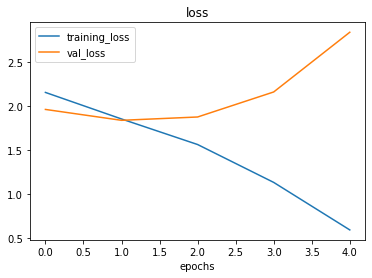

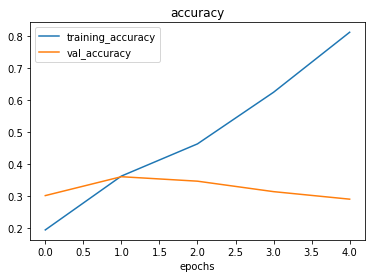

In [17]:
plot_loss_curves(history_baseline_multiclass)

## 6. Adjust the model hyperparameters (to beat the baseline/ reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's n ot generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simply the model** - if our current model is overfitting the data, it mayt be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers.
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer leverages the patterns another  model has learned on similar data to your orwn and allows to use those patterns on you own dataset.

In [18]:
model_baseline_multiclass_2 = Sequential([
                                          Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
                                                 MaxPool2D(),
                                                 Conv2D(10, 3, activation="relu"),
                                                 MaxPool2D(),
                                                 Flatten(),
                                                 Dense(10, activation="softmax")
])

model_baseline_multiclass_2.compile(loss="categorical_crossentropy",
                                    optimizer=tf.keras.optimizers.Adam(),
                                    metrics=["accuracy"])

In [19]:
history_baseline_multiclass_2 = model_baseline_multiclass_2.fit(train_data,
                                                                epochs=5,
                                                                steps_per_epoch=len(train_data),
                                                                validation_data=test_data,
                                                                validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 68s 286ms/step - loss: 2.1027 - accuracy: 0.2505 - val_loss: 1.8987 - val_accuracy: 0.3320
Epoch 2/5
235/235 [==============================] - 66s 282ms/step - loss: 1.7492 - accuracy: 0.4079 - val_loss: 1.8977 - val_accuracy: 0.3284
Epoch 3/5
235/235 [==============================] - 56s 237ms/step - loss: 1.4742 - accuracy: 0.5093 - val_loss: 1.8010 - val_accuracy: 0.3748
Epoch 4/5
235/235 [==============================] - 42s 180ms/step - loss: 1.1272 - accuracy: 0.6443 - val_loss: 1.9530 - val_accuracy: 0.3332
Epoch 5/5
235/235 [==============================] - 43s 182ms/step - loss: 0.7417 - accuracy: 0.7736 - val_loss: 2.2264 - val_accuracy: 0.3212


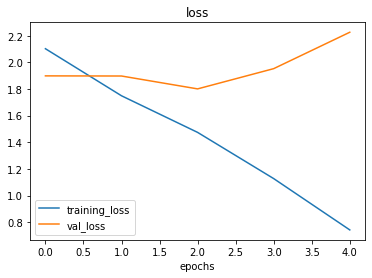

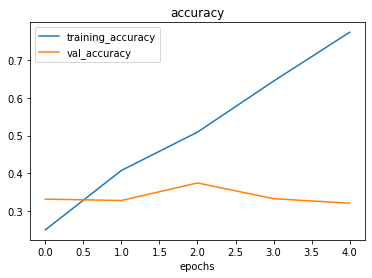

In [20]:
plot_loss_curves(history_baseline_multiclass_2)

Let's try data augmentation

### Reducing overfitting with data augmentation

Ideally we want to:

* Reduce overfitting (get the train and valid loss curves
* Improve validation accuracy

In [25]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical",
                                                                   shuffle=True)

Found 7500 images belonging to 10 classes.


In [26]:
model_baseline_multiclass_3 = tf.keras.models.clone_model(model_baseline_multiclass_2)

model_baseline_multiclass_3.compile(loss="categorical_crossentropy",
                                    optimizer=tf.keras.optimizers.Adam(),
                                    metrics=["accuracy"])

In [27]:
history_baseline_multiclass_3 = model_baseline_multiclass_3.fit(train_data_augmented,
                                epochs=5,
                                steps_per_epoch=len(train_data_augmented),
                                validation_data=test_data,
                                validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 111s 465ms/step - loss: 2.1710 - accuracy: 0.2175 - val_loss: 2.0449 - val_accuracy: 0.2748
Epoch 2/5
235/235 [==============================] - 106s 450ms/step - loss: 2.0560 - accuracy: 0.2764 - val_loss: 1.9003 - val_accuracy: 0.3204
Epoch 3/5
235/235 [==============================] - 105s 447ms/step - loss: 2.0047 - accuracy: 0.2957 - val_loss: 1.8821 - val_accuracy: 0.3496
Epoch 4/5
235/235 [==============================] - 105s 447ms/step - loss: 1.9649 - accuracy: 0.3144 - val_loss: 1.8137 - val_accuracy: 0.3664
Epoch 5/5
235/235 [==============================] - 105s 445ms/step - loss: 1.9459 - accuracy: 0.3225 - val_loss: 1.7913 - val_accuracy: 0.3892


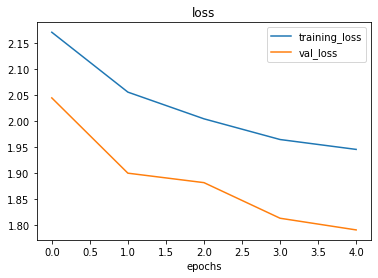

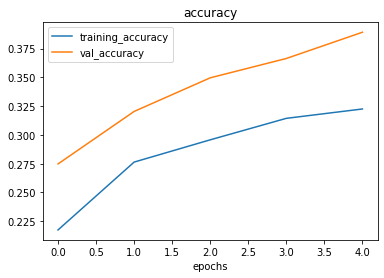

In [28]:
plot_loss_curves(history_baseline_multiclass_3)

Now it looks like much better! With more epochs we could get even better performance.